In [4]:
import numpy as np
import scipy.io as io
import h5py
import deepdish as dd
import os

import skimage
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
sns.set(style="white")
sns.set_color_codes("pastel")

if 1:
    import plotly.plotly as py

In [5]:
#Lets choose a monkey
Monkey  = 'M1'
h5path = '../../../V4pydata/H5data/M1'
fname = os.listdir(h5path)
print 'files from Monkey %s: ' % Monkey
fname

files from Monkey M1: 


['bucky090910.h5',
 'bucky090910_mergedpeaks.h5',
 'bucky090910_unmergedpeaks.h5']

In [6]:
#Lets choose a session/file
thisfile = fname[2]
print 'lez look at file: %s' % thisfile[:-3]

lez look at file: bucky090910_unmergedpeaks


In [7]:
### Read in using deepdish
dat = dd.io.load(h5path+'/'+ thisfile)

print 'These are the 2 main fields of this structure:'
print dat.keys()
print 
nneurons = np.size(dat['spikes'].keys())
print 'It has %.0f neurons' % nneurons
print
print 'These are the features of eye movement:'
print np.array(dat['eyes'][0].keys())




These are the 2 main fields of this structure:
['eyes', 'spikes']

It has 142 neurons

These are the features of eye movement:
['in_sac_blink' 'imname' 'fix_offset' 'fix_offset_col' 'trial'
 'out_sac_blink' 'out_sac_dur' 'col' 'fixation' 'out_sac_pkvel'
 'in_sac_dur' 'impath' 'fix_onset' 'fix_offset_row' 'fix_onset_col'
 'in_sac_pkvel' 'fix_onset_row' 'row']


In [5]:
#looks like there is a bug here... somehow these two fields always match...
# check if it is solved
check = np.sum(np.diff([[dat['eyes'][i]['in_sac_blink'], dat['eyes'][i]['out_sac_blink']] for i in dat['eyes']], axis=1))
if check:
    print "Solved"
else:
    print ""

0

In [6]:
dat['eyes'][0]

{'col': 1244.0,
 'fix_offset': 93.350999999999999,
 'fix_offset_col': 1235.0,
 'fix_offset_row': 789.0,
 'fix_onset': 92.965000000000003,
 'fix_onset_col': 1198.0,
 'fix_onset_row': 788.0,
 'fixation': 1,
 'imname': 'blackscene.jpg',
 'impath': 'stimuli/M1/scenes',
 'in_sac_blink': 0,
 'in_sac_dur': 0.044999999999999998,
 'in_sac_pkvel': 54.631806830523523,
 'out_sac_blink': 0,
 'out_sac_dur': 0.035000000000000003,
 'out_sac_pkvel': 41.15751273458681,
 'row': 787.0,
 'trial': 1}

In [7]:
n_fixations = np.size([i for i in dat['eyes']])
n_trails = np.size(np.unique([dat['eyes'][i]['trial'] for i in dat['eyes']]))
num_last_trial = (np.unique([dat['eyes'][i]['trial'] for i in dat['eyes']]))[-1]

print '%.0f fixations' % np.size([i for i in dat['eyes']])
print '%.0f trials' % n_trails
print 'last trial number: %.0f' % num_last_trial
print 'number of trials missing: %.0f' % (num_last_trial - n_trails)
print 'these were "aborted trials"'

21909 fixations
932 trials
last trial number: 965
number of trials missing: 33
these were aborted trials


In [8]:
#this takes more that 10 seconds to compute
trials = np.unique([dat['eyes'][i]['trial'] for i in dat['eyes']])
fix_n_per_trial = [np.size([dat['eyes'][tr_idx]['fixation'] for tr_idx in dat['eyes'] if dat['eyes'][tr_idx]['trial']==tr_n]) for tr_n in trials] 

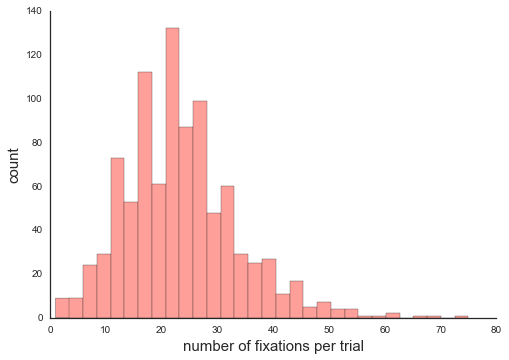

In [9]:
dummy = plt.hist(fix_n_per_trial, 30, color='r')
plt.xlabel('number of fixations per trial',fontsize=15)
plt.ylabel('count',fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

running fo monkey: M1
for file: bucky090910_unmergedpeaks.h5


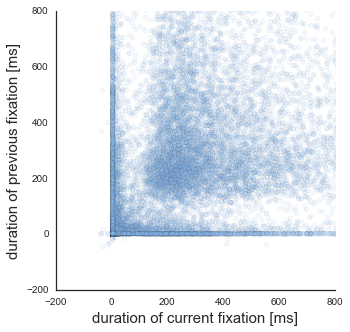

In [13]:
#let's look at fixation durations

print 'running fo monkey: ' + Monkey
print 'for file: ' + thisfile
    
fix_onset_times = np.array([dat['eyes'][fix]['fix_onset'] for fix in dat['eyes']])
fix_offset_times = np.array([dat['eyes'][fix]['fix_offset'] for fix in dat['eyes']])

fix_dur = fix_offset_times-fix_onset_times

mpl_fig_obj, ax = plt.subplots(figsize=(5, 5))

cur_fix_dur = fix_dur[1:]*1000
prev_fix_dur = fix_dur[0:-1]*1000

plt.scatter(cur_fix_dur , prev_fix_dur, s=20,  alpha=0.1)

plt.xlabel('duration of current fixation [ms]',fontsize=15)
plt.ylabel('duration of previous fixation [ms]',fontsize=15)
#plt.title( Monkey + '; file:' + thisfile[:-3], fontsize=15)
plt.xlim([-200,800])
plt.ylim([-200,800])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#run if you want plotly
#py.iplot_mpl(mpl_fig_obj)

In [14]:
eyes_pos = np.array([[dat['eyes'][i]['col'], dat['eyes'][i]['row']] for i in dat['eyes']])
from scipy import stats

m = stats.mode(768-eyes_pos[:,1])
print m

ModeResult(mode=array([ 1290.]), count=array([1846]))


In [15]:
not_nan = np.array([i>=0 or i<0 for i in eyes_pos[:,0]])
Mode = stats.mode(eyes_pos)[0][0]
not_mode_col = np.array([i!=Mode[1] for i in eyes_pos[:,1]])
not_mode_row = np.array([i!=Mode[0] for i in eyes_pos[:,0]])


In [16]:
remove = np.intersect1d(np.where(not_nan)[0], np.where(not_mode_col)[0])
remove = np.intersect1d(remove, np.where(not_mode_row)[0])
print np.sum(not_nan)
print np.size(remove)

21890
19116


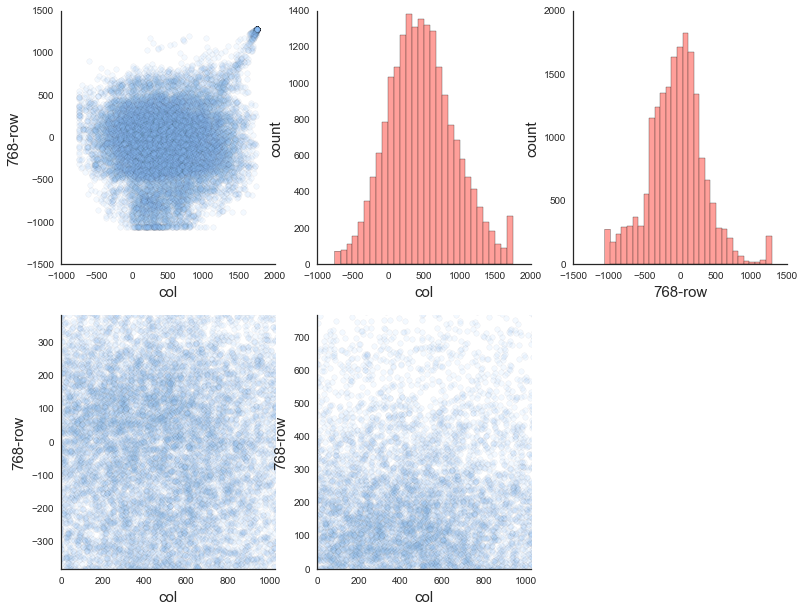

In [17]:
f, ax = plt.subplots(figsize=(13, 10))
plt.subplot(231)
plt.scatter(eyes_pos[remove,0], 768-eyes_pos[remove,1], s=30,  alpha=0.1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('col',fontsize=15)
plt.ylabel('768-row',fontsize=15)
ax.figsize=(100, 120)
plt.subplot(234)
plt.scatter(eyes_pos[remove,0], 768-eyes_pos[remove,1], s=30,  alpha=0.1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('col',fontsize=15)
plt.ylabel('768-row',fontsize=15)
ax.figsize=(100, 120)
plt.xlim([1,1024])
plt.ylim([1-768/2.,768-768/2.])

plt.subplot(235)
plt.scatter(eyes_pos[remove,0], 768-eyes_pos[remove,1], s=30,  alpha=0.1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('col',fontsize=15)
plt.ylabel('768-row',fontsize=15)
ax.figsize=(100, 120)
plt.xlim([1,1024])
plt.ylim([1,768])

plt.subplot(232)
dummy = plt.hist(eyes_pos[remove,0],30, color='r')
plt.xlabel('col',fontsize=15)
plt.ylabel('count',fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplot(233)
dummy = plt.hist(768-eyes_pos[remove,1],30, color='r')
plt.xlabel('768-row',fontsize=15)
plt.ylabel('count',fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [18]:
In_sac_blink = [i for i in dat['eyes'] if dat['eyes'][i]['in_sac_blink']]
NotIn_sac_blink = [i for i in dat['eyes'] if not dat['eyes'][i]['in_sac_blink']]
remove_in = np.intersect1d(remove, In_sac_blink)
remove_notin = np.intersect1d(remove, NotIn_sac_blink)
In_screen = [i for i, pos in enumerate(eyes_pos) if pos[0]>1 and pos[0]<1024 and (768-pos[1])>0-768/2. and (768-pos[1])<0+768/2.]
Off_screen = [i for i, pos in enumerate(eyes_pos) if pos[0]<1 or pos[0]>1024 or (768-pos[1])<0-768/2. or (768-pos[1])>0+768/2.]
remove_In_scr = np.intersect1d(remove, In_screen)
remove_Off_scr = np.intersect1d(remove, Off_screen)

np.size(In_screen)

9974

In [19]:
print "%.0f fixations inside screen" % np.size(In_screen)
print "%.0f fixations outside screen" % np.size(Off_screen)

print "%.0f fixations related to in saccade blinks" % np.size(In_sac_blink)
print "%.0f fixations not related to in saccade blinks" % np.size(NotIn_sac_blink)

print "%.0f fixations in screen and not related to in saccade blinks" % np.size(np.intersect1d(remove_In_scr, NotIn_sac_blink))

9974 fixations inside screen
11890 fixations outside screen
2894 fixations related to in saccade blinks
19015 fixations not related to in saccade blinks
9130 fixations in screen and not related to in saccade blinks


1 
(21909,)
2 
(6263,)
(6263, 110)
41
65.0
165.0
1 
(21909,)
2 
(4981,)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



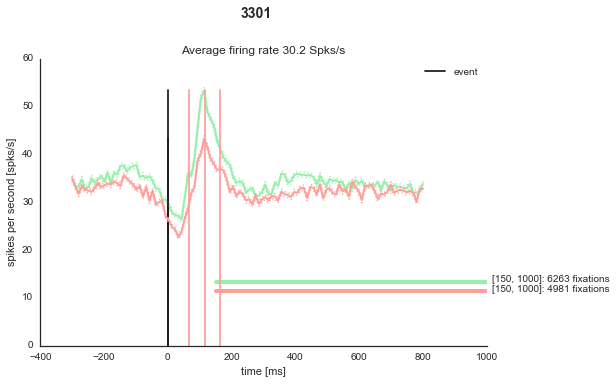

In [20]:
#let's plot psths of inside vs outside
spikes = dat['spikes']
neuron_list = spikes.keys()
firing_rates = np.array([np.size(spikes[j])/(spikes[j][-1]-spikes[j][0]) for i,j in enumerate(spikes)])
idx_maxFR = np.argmax(firing_rates)
neuronid = neuron_list[idx_maxFR]
spike_times = dat['spikes'][neuronid]
interv = [150,1000]

b_size = 10
# in vs out of screen
#rest_in = remove_In_scr
#rest_out = remove_Off_scr

# in vs out of screen without sac blinck
rest_in = np.intersect1d(remove_In_scr, NotIn_sac_blink)
rest_out = np.intersect1d(remove_Off_scr, NotIn_sac_blink)

fig = plt.figure()
dummy, event_times =  get_event_times_restict(fix_onset_times, fix_offset_times, rest_in,  interv, 'fix_onset')
raster = make_psth(spike_times, event_times, t_window=[-300,800], bin_size=b_size,  title = neuronid, Color='g',fix_durs = interv)

print np.shape(raster)
t_window=[-300,800]
a = np.argmax(np.mean(raster,axis=0))
print a
#b_size = 5
argmax = (a+0.5)*b_size+t_window[0]
argmax_inf = (a+0.5)*b_size+t_window[0]-50
argmax_sup = (a+0.5)*b_size+t_window[0]+50
print argmax_inf
print argmax_sup
plt.plot([argmax,argmax],[0,np.max(np.mean(raster/float(b_size)*1000,axis=0))], color='r')
plt.plot([argmax_inf,argmax_inf],[0,np.max(np.mean(raster/float(b_size)*1000,axis=0))], color='r')
plt.plot([argmax_sup,argmax_sup],[0,np.max(np.mean(raster/float(b_size)*1000,axis=0))], color='r')


dummy, event_times =  get_event_times_restict(fix_onset_times, fix_offset_times,rest_out, interv, 'fix_onset')
raster = make_psth(spike_times, event_times, t_window=[-300,800], bin_size=b_size,  title = neuronid, Color='r',fix_durs = interv)

#event_times =  get_event_times_restict(fix_onset_times, fix_offset_times, interv, 'fix_onset')
#raster = make_psth(spike_times, event_times, t_window=[-300,800], bin_size=b_size,  title = neuronid, Color='k',fix_durs = interv)

plt.legend()



In [21]:
t_window=[60,160]
b_size = 5
raster = make_psth(spike_times, event_times, t_window=t_window, bin_size=b_size,  title = neuronid, Color='r',fix_durs = interv)


a = np.argmax(np.mean(raster,axis=0))
print np.shape(raster)
print a

a*b_size+t_window[0]

(4981, 20)
10


110

In [ ]:
# show fixations and how they are off the screen

In [ ]:
# here look a some trial related features e.g. on vs off the screen and plot both PSTHs

In [ ]:
# here explain what we are going to try to predict, a window of size 100 aroung peak

# Letz make some features

In [ ]:
#functions that make features
#plot correlations with Y
#lez restrict our analysis to a subset of fixations


In [24]:
b_size = 5
time_res = 0.001*b_size
interv = [-100,10000]
t_window=[65,165]
restrict_1 = np.intersect1d(remove_In_scr, NotIn_sac_blink)
print '%.0f valid fixations inside the screen from non-blink insaccades' % np.shape(restrict_1)[0] 
dat['eyes'][restrict_1[0]] 
val_len_fix_y, event_times =  get_event_times_restict(fix_onset_times, fix_offset_times, restrict_1, fix_durs = interv, event = 'fix_onset')
print np.shape(np.intersect1d(val_len_fix_y,restrict_1))
print '%.0f of those fixations had duration in the  %sms time window' % (np.size(event_times),str(interv))

n_max_seconds = spike_times[-1]
n_min_seconds = spike_times[0]
event_times = event_times[event_times < n_max_seconds]
event_times = event_times[event_times > n_min_seconds]

# getting the Ys
bins = np.arange(np.floor(n_min_seconds),np.ceil(n_max_seconds),time_res)
[spike_counts, bin_edges] = np.histogram(spike_times, bins)
[event_counts, bin_edges] = np.histogram(event_times, bins)
idx_event =  np.where(event_counts > 0)[0]
#print np.shape(event_counts)
#print np.shape(idx_event)

psth = np.array([(spike_counts[(i+t_window[0]/b_size):(i+t_window[1]/b_size)]) for i in idx_event])
Y = np.sum(psth,axis=1)
#print np.shape(Y)

#now trying to get the X, why don't we get the same number?
#computing some features
fix_number = [dat['eyes'][i]['fixation'] for i in dat['eyes']]
fix_number = np.transpose(np.atleast_2d(fix_number))

in_sac_blink = [dat['eyes'][i]['in_sac_blink'] for i in dat['eyes']]
in_sac_blink = np.transpose(np.atleast_2d(in_sac_blink))

trial_n = np.transpose(np.atleast_2d([dat['eyes'][i]['trial'] for i in dat['eyes']]))
fix_onset_times = np.array([dat['eyes'][fix]['fix_onset'] for fix in dat['eyes']])
fix_offset_times = np.array([dat['eyes'][fix]['fix_offset'] for fix in dat['eyes']])
#fix_dur = np.transpose(np.atleast_2d(fix_offset_times-fix_onset_times))
fix_dur = np.transpose(np.atleast_2d(np.array([(fix_offset_times[fix_offset_times>i]-i)[0] for i in fix_onset_times])))

#interv = [0,2000]

#X = np.concatenate((fix_number,in_sac_blink),axis=1)
#X = np.concatenate((fix_number,trial_n),axis=1)
feat_names = ['trial_n']
X = np.concatenate((trial_n,fix_dur),axis=1)
feat_names = np.append(feat_names,'fix_dur')
X = np.concatenate((X,np.transpose(np.atleast_2d(np.append(0,fix_dur[:-1])))),axis=1)
feat_names = np.append(feat_names,'fix_dur_1bf')
X = np.concatenate((X,np.transpose(np.atleast_2d(np.append([0,0],fix_dur[:-2])))),axis=1)
feat_names = np.append(feat_names,'fix_dur_2bf')

val_len_fix = np.intersect1d(np.where(fix_dur>interv[0]/1000.),np.where(fix_dur<interv[1]/1000.))
print np.shape(restrict_1)
print np.shape(val_len_fix)

print np.shape(np.intersect1d(restrict_1,val_len_fix))
X = X[np.intersect1d(restrict_1,val_len_fix),:]

9130 valid fixations inside the screen from non-blink insaccades
1 
(21909,)
2 
(9130,)
(9130,)
9130 of those fixations had duration in the  [-100, 10000]ms time window
(9130,)
(21908,)
(9130,)


# Lez predict

to do: get predictions on training set also

### first define a bunch of classifiers, cost function and a cross-validation function

In [430]:
from datetime import datetime
from csv import DictReader
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

def csv_to_vw(loc_csv, loc_output, train=True):
    with open(loc_output,"wb") as outfile:
        for e, row in enumerate( DictReader(open(loc_csv)) ):
            #Creating the features
            numerical_features = ""
            categorical_features = ""
            for k,v in row.items():
                if k not in ["Label"]:
                    if 1:#"_i" in k: # numerical feature
                        if len(str(v)) > 0: #check for empty values
                            numerical_features += " %s:%s" % (k,v)
                    if 0:#"_c" in k: # categorical feature
                        if len(str(v)) > 0:
                            categorical_features += " %s" % v

            #Creating the labels		  
            if train: #we care about labels
                label = '%.1f' % float(row['Label'])
                #else:
                outfile.write( "%s |A %s \n" % (label, numerical_features) )

            else: #we dont care about labels
                outfile.write( "1 |A %s \n" % (numerical_features) )

            #Reporting progress
            #if e % 1000000 == 0:
             #   print("%s\t%s"%(e, str(datetime.now() - start)))

    #print("\n %s Task execution time:\n\t%s"%(e, str(datetime.now() - start)))




In [432]:
Y_hat_vw, pR2_cv_vw= fit_cv(X, Y, algorithm = 'vw_reg', n_cv=10, silent=0)

...runnning cv-fold 1 of 10
pR2:  -0.175397744301
...runnning cv-fold 2 of 10
pR2:  -0.157690980284
...runnning cv-fold 3 of 10
pR2:  -0.14612978208
...runnning cv-fold 4 of 10
pR2:  -0.116968428185
...runnning cv-fold 5 of 10
pR2:  -0.109679331268
...runnning cv-fold 6 of 10
pR2:  -0.0876432741055
...runnning cv-fold 7 of 10
pR2:  -0.185547798983
...runnning cv-fold 8 of 10
pR2:  -0.101715005949
...runnning cv-fold 9 of 10
pR2:  -0.0665502547157
...runnning cv-fold 10 of 10
pR2:  -0.110692740066
pR2_cv: -0.125802 (+/- 0.011650)


In [423]:
fit_cv(X, Y, algorithm = 'pyglmnet_pv', n_cv=10, silent=1)

(1, 919)
(1, 917)
(1, 918)
(1, 915)
(1, 912)
(1, 911)
(1, 911)
(1, 910)
(1, 908)
(1, 909)
pR2_cv: 0.024996 (+/- 0.004206)


(array([ 3.62820317,  3.27164218,  3.23776015, ...,  4.75068608,
         4.67039172,  4.71476445]),
 [0.014310017294051902,
  0.012038411740253219,
  0.019600249471146136,
  0.022549181573913168,
  0.027761283177759721,
  0.04150387752507223,
  0.00039836043451801917,
  0.034445638101759268,
  0.045843998365150518,
  0.031506818418694182])

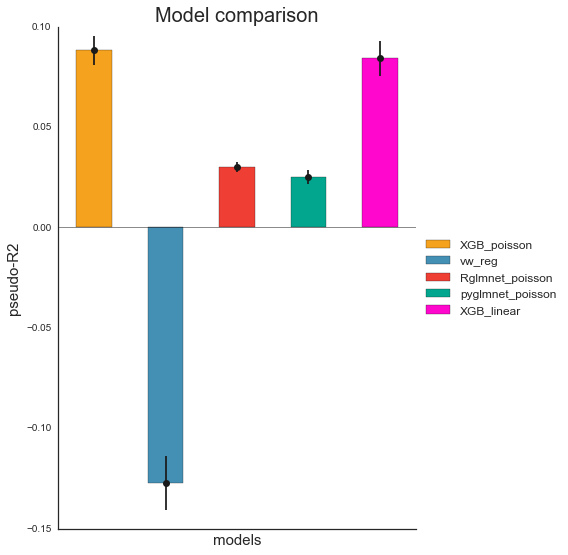

In [672]:
import xgboost as xgb
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import KFold
from sklearn.cross_validation import LabelKFold
import os
import time
from sklearn.preprocessing import StandardScaler
from lasagne.layers import DenseLayer
from lasagne.layers import InputLayer
from lasagne.layers import DropoutLayer
from lasagne.nonlinearities import softmax
from lasagne.updates import adagrad
from nolearn.lasagne import NeuralNet
from lasagne.updates import nesterov_momentum
import theano
import pyglmnet as pyglmnet


def vw_reg(Xr, Yr, Xt):
    
    feat_names = ['%.0f_i' % i for i in np.arange(np.shape(Xr)[1])]
    X_train = pd.DataFrame(Xr, index=None, columns = feat_names)
    X_train['Label'] = Yr
    X_test = pd.DataFrame(Xt, index=None, columns = feat_names)

    #print 'CREATING CSV FILES...-------------------------'
    X_train.to_csv('X_train.csv',index=False)
    X_test.to_csv('X_test.csv',index=False)
    
    #print 'CSV ---> VW...--------------------------------'
    loc_csv = './X_train.csv'
    loc_output = './X_train.vw'
    csv_to_vw(loc_csv, loc_output, train=True)

    loc_csv = './X_test.csv'
    loc_output = './X_test.vw'
    csv_to_vw(loc_csv, loc_output, train=False)
    
    os.system('vw X_train.vw -f fitted.model')
    os.system('vw -t X_test.vw -i fitted.model -p test.pred')
    
    Yt = pd.read_csv('./test.pred', header=None)
    Yt = np.transpose(np.atleast_2d(list(Yt.values)))
    return Yt


def poisson_logloss(y, yhat, ynull):
    eps=np.spacing(1)
    
    L1 = np.sum(y*np.log(eps+yhat) - yhat)
    L1_v = y*np.log(eps+yhat) - yhat
    #print np.shape(L1_v)
    L0 = np.sum(y*np.log(eps+ynull) - ynull)
    LS = np.sum(y*np.log(eps+y) - y)
    R2 = 1-(LS-L1)/(LS-L0)
    
    return R2


def pyglmnet_poisson(Xr, Yr, Xt):
    scaler = StandardScaler().fit(Xr)
    Xr=scaler.transform(Xr)
    Xt=scaler.transform(Xt)
    
    Yr = np.transpose(np.atleast_2d(Yr))
    
    model = pyglmnet.glm('poisson')
    reg_lambda = [0]#np.logspace(np.log(0.5), np.log(0.01), 10, base=np.exp(1))
    alpha = 1

    reg_params = dict()
    reg_params['reg_lambda'] = reg_lambda
    reg_params['alpha'] = alpha

    # Set optimization parameters
    opt_params = dict()
    opt_params['learning_rate'] = 1e-4
    opt_params['max_iter'] = 1000

    # Fit model to training data
    fit = model.fit(Xr,Yr,reg_params,opt_params,verbose='False')
    #print fit
    fitparams = fit[0]
    Yt = model.predict(Xt, fitparams)
    Yt = np.transpose(np.atleast_2d(list(Yt)))
    return Yt

def Rglmnet_linear(Xr, Yr, Xt):
    scaler = StandardScaler().fit(Xr)
    Xr=scaler.transform(Xr)
    Xt=scaler.transform(Xt)
    
    X_train = pd.DataFrame(Xr, index=None)
    Y_train = pd.DataFrame(Yr, index=None)
    X_test = pd.DataFrame(Xt, index=None)

    #print "saving csv files"
    X_train.to_csv('X_train.csv',index=False)
    Y_train.to_csv('Y_train.csv',index=False)
    X_test.to_csv('X_test.csv',index=False)
    
    #print "running R"
    os.system('Rscript cv_glmnet_linear.R')
    
    #print 'loading predictions'
    Yt = pd.read_csv('./Y_pred.csv')
    
    return Yt['s0']

def Lasagne(Xr, Yr, Xt):
    X_train = Xr.astype(np.float32)
    X_test = Xt.astype(np.float32)
    scaler = StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    Yr = np.transpose(np.atleast_2d(Yr.astype(np.float32)))
    n,num_features=Xr.shape
    #print np.shape(X_train)
    #print np.shape(Yr)
    layers0 = [('input', InputLayer),
          ('dense0', DenseLayer),
          ('dropout0', DropoutLayer),
          ('dense1', DenseLayer),
          ('dropout1', DropoutLayer),
          ('dense2', DenseLayer),
          ('dropout2', DropoutLayer),
          ('dense3', DenseLayer),
          ('dropout3', DropoutLayer),
          ('output', DenseLayer)]
          
    net1 = NeuralNet(layers=layers0,                 
            input_shape=(None, num_features),
            dense0_num_units=1000,
            dropout0_p=0.6,
            dense1_num_units=500,
            dropout1_p=0.6,
            dense2_num_units=500,
            dropout2_p=0.6,
            dense3_num_units=300,
            dropout3_p=0.5,
            output_num_units=1,

            update=adagrad,#nesterov_momentum,
            #update_learning_rate=0.01,
            update_learning_rate=0.005,
            #update_momentum=0.9,
            regression=True,

            verbose=1,
            max_epochs=10)

    net1.fit(X_train, Yr)    
    Yt = net1.predict_proba(X_test)  
    np.transpose(np.atleast_2d(list(Yt)))
    return Yt

def Rglmnet_poisson(Xr, Yr, Xt):
    scaler = StandardScaler().fit(Xr)
    Xr=scaler.transform(Xr)
    Xt=scaler.transform(Xt)
    
    X_train = pd.DataFrame(Xr, index=None)
    Y_train = pd.DataFrame(Yr, index=None)
    X_test = pd.DataFrame(Xt, index=None)

    #print "saving csv files"
    X_train.to_csv('X_train.csv',index=False)
    Y_train.to_csv('Y_train.csv',index=False)
    X_test.to_csv('X_test.csv',index=False)
    
    #print "running R"
    os.system('Rscript cv_glmnet_poisson.R')
    
    #print 'loading predictions'
    Yt = pd.read_csv('./Y_pred.csv')
    
    return np.exp(Yt['s0'])

def XGB_poisson(Xr, Yr, Xt):
    param = {'objective': "count:poisson",
    'eval_metric': "logloss",
    'num_parallel_tree': 1,
    'eta':0.07,
    'gamma':1, # default = 0
    'max_depth': 3,
    'num_class': 1,
    'colsample_bytree':0.7,
    'subsample': 0.8,
    'seed':2925,
    'silent':1}
    param['nthread'] = 4
    
    dtrain = xgb.DMatrix( Xr, label=Yr)
    dtest = xgb.DMatrix( Xt)
      
    num_round = 200
    bst = xgb.train( param, dtrain, num_round )
   
    Yt = bst.predict( dtest )
    return Yt

def XGB_linear(Xr, Yr, Xt):
    param = {'objective': "reg:linear",
    'eval_metric': "logloss",
    'num_parallel_tree': 1,
    'eta':0.07,
    'gamma':1, # default = 0
    'max_depth': 3,
    'num_class': 1,
    'colsample_bytree':0.7,
    'subsample': 0.8,
    'seed':2925,
    'silent':1}
    param['nthread'] = 4
    
    dtrain = xgb.DMatrix( Xr, label=Yr)
    dtest = xgb.DMatrix( Xt)
      
    num_round = 200
    bst = xgb.train( param, dtrain, num_round )
   
    Yt = bst.predict( dtest )
    return Yt


def fit_cv(X, Y, algorithm = 'XGBoost',n_cv=10, silent=1):
    

    #skf = StratifiedKFold(Y, n_cv, shuffle=True, random_state=1)
    #skf  = KFold(n=np.size(Y), n_folds=n_cv, shuffle=False,random_state=None)
    #print np.shape(X[:,0])
    skf  = LabelKFold(X[:,0], n_folds=n_cv)
    i=1

    Y_hat=np.zeros(len(Y))
    pR2_cv = []

    for train, test in skf:
        if not silent:
            print '...runnning cv-fold', i, 'of', n_cv
        i+=1
        idx_t = test
        idx_r = train
        Xr = X[idx_r,:]

        Yr = Y[idx_r]               
        Xt = X[idx_t,:]

        Yt = Y[idx_t]
        #print np.unique(Xt[:,1])
        #print np.unique(Xr[:,1])
        #print np.intersect1d(np.unique(Xt[:,0]),np.unique(Xr[:,0]))
        Yt_hat = eval(algorithm)(Xr, Yr , Xt)

        Y_hat[idx_t]= Yt_hat 

        pR2 = poisson_logloss(Yt, Yt_hat, np.mean(Yr))
        pR2_cv.append(pR2)  
        
        if not silent:
            print 'pR2: ', pR2
    
    if not silent:
        print("pR2_cv: %0.6f (+/- %0.6f)" % (np.mean(pR2_cv), np.std(pR2_cv)/np.sqrt(n_cv)))
    
    return Y_hat, pR2_cv

def vis_pred(Lambda_hat, Y, title):
    
    mpl_fig_obj, ax = plt.subplots(figsize=(10, 10))
    
    plt.subplot(211)
    plt.title(title)
    x_noise = 0.2*np.random.randn(np.size(Y))
    plt.scatter(Y+x_noise, Lambda_hat, s = 50, alpha=0.2, color='r')
    plt.xlabel('number of spikes',fontsize=15)
    #plt.xlim([-1,20])
    plt.ylabel('predicted rate',fontsize=15)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.subplot(223)
    dum = plt.hist(Lambda_hat, 20, color='r')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel('predicted rate',fontsize=15)
    plt.ylabel('count',fontsize=15)
    
    plt.subplot(224)
    dum = plt.hist(Y, 20, color='r')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel('number of spikes',fontsize=15)
    plt.ylabel('count',fontsize=15)
    
    #return mpl_fig_obj

def fit_models(model_list, X=X, Y=Y, n_cv=10):
    Yt_pred = {}
    pR2s_cv = {}
    print '...running %.0f models: %s' % (len(model_list),str(model_list))
    for n, model_name in enumerate(model_list):
        print 
        tstart = time.time()
        Yt_pred[model_name], pR2s_cv[model_name] = fit_cv(X, Y, algorithm = model_name, n_cv=10, silent=1)
        pR2_mean = np.mean(pR2s_cv[model_name])
        pR2_sem = np.std(pR2s_cv[model_name])/np.sqrt(n_cv)
        run_time = time.time()-tstart
        print 'model %s: pseudo-R2 = %0.4f (+/-%0.4f); run time = %0.2fs'% (model_name, pR2_mean, pR2_sem, run_time)
    return Yt_pred, pR2s_cv


def plot_model_comparison(pR2s_cv):
    
    pR2_means = []
    pR2_sem = []
    for m, model_name in enumerate(pR2s_cv.keys()):
        pR2_means.append(np.mean(pR2s_cv[model_name]))
        pR2_sem.append(np.std(pR2s_cv[model_name])/np.sqrt(np.size(pR2s_cv[model_name])))

    n_models = np.size(pR2s_cv.keys())
    x = np.arange(n_models)+0.25
    x_eb = x+np.diff(x)[0]/2.*0.5
    width = np.diff(x)[0]*0.5
    y = pR2_means
    yerr = pR2_sem
    Colors = ['#F5A21E','#448FB4','#EF3E34','#02A68E','#FF07CD'] 

    f, ax = plt.subplots(figsize=(8, 9))
    for i in np.arange(n_models):
        plt.bar(x[i], y[i], width = width, color = Colors[i])    
    plt.errorbar(x_eb, y, marker='o', color = 'k', yerr=yerr, ls='none')
    plt.title('Model comparison', fontsize=20)
    plt.ylabel('pseudo-R2',fontsize = 15)
    plt.xlabel('models',fontsize = 15)
    plt.xlim([0,n_models])

    plt.tick_params(
        axis='x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off') 
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # Put a legend to the right of the current axis
    ax.legend(pR2s_cv.keys(),loc='center left', bbox_to_anchor=(1,0.5), fontsize=12)
    plt.plot([0,x[-1]+1],[0,0],color='k',lw=0.5)

# **Lez run some models**

In [654]:
model_list = ['XGB_poisson','XGB_linear','Rglmnet_poisson','pyglmnet_poisson','vw_reg']
Yt_preds, pR2s_cv = fit_models(model_list)

...running 5 models: ['XGB_poisson', 'XGB_linear', 'Rglmnet_poisson', 'pyglmnet_poisson', 'vw_reg']

model XGB_poisson: pseudo-R2 = 0.0883 (+/-0.0073); run time = 4.25s

model XGB_linear: pseudo-R2 = 0.0842 (+/-0.0086); run time = 4.21s

model Rglmnet_poisson: pseudo-R2 = 0.0302 (+/-0.0024); run time = 25.28s

model pyglmnet_poisson: pseudo-R2 = 0.0250 (+/-0.0035); run time = 0.18s

model vw_reg: pseudo-R2 = -0.1271 (+/-0.0136); run time = 4.13s


# **Lez plot!**

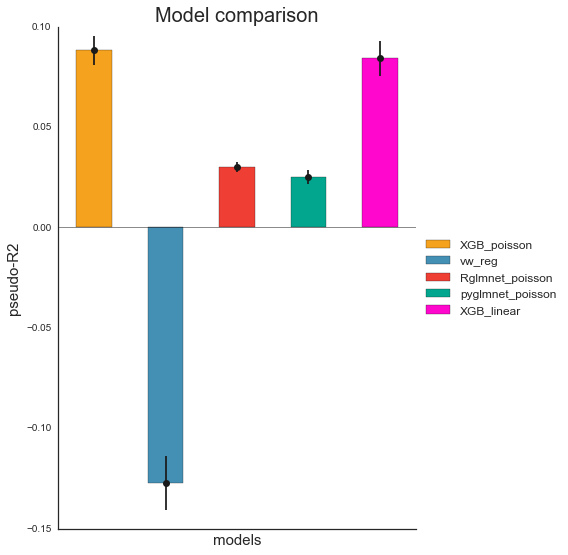

In [673]:
plot_model_comparison(pR2s_cv)

In [651]:

title = 'py_glmnet: %.4f pR2' % (np.mean(pR2_cv_pyglmnet))
vis_pred(Yt_, Y, title)


In [495]:
Y_hat_pyglmnet, pR2_cv_pyglmnet= fit_cv(X, Y, algorithm = 'vw_reg', n_cv=10, silent=0)

...runnning cv-fold 1 of 10
pR2:  -0.139771175937
...runnning cv-fold 2 of 10
pR2:  -0.192586636877
...runnning cv-fold 3 of 10
pR2:  -0.166442507262
...runnning cv-fold 4 of 10
pR2:  -0.116098458605
...runnning cv-fold 5 of 10
pR2:  -0.0818640424502
...runnning cv-fold 6 of 10
pR2:  -0.173408383479
...runnning cv-fold 7 of 10


KeyboardInterrupt: 

In [481]:
Y_hat_cv_cvglmnet, pR2_cv_cvglmnet = fit_cv(X, Y, algorithm = 'cv_glmnet_poisson', n_cv=10, silent=0)

...runnning cv-fold 1 of 10
pR2:  0.0331096042296
...runnning cv-fold 2 of 10
pR2:  0.0147851059448
...runnning cv-fold 3 of 10
pR2:  0.0264913474584
...runnning cv-fold 4 of 10
pR2:  0.0284512049532
...runnning cv-fold 5 of 10
pR2:  0.0380586625798
...runnning cv-fold 6 of 10
pR2:  0.0196087888217
...runnning cv-fold 7 of 10
pR2:  0.0308398603661
...runnning cv-fold 8 of 10
pR2:  0.0398155373622
...runnning cv-fold 9 of 10
pR2:  0.0347910834637
...runnning cv-fold 10 of 10
pR2:  0.0359068664739
pR2_cv: 0.030186 (+/- 0.002415)


In [358]:
np.shape(L1_v_pyglmnet)

(909, 909)

In [480]:
Y_hat_pyglmnet, pR2_cv_pyglmnet = fit_cv(X, Y, algorithm = 'pyglmnet_pv', n_cv=10, silent=0)

...runnning cv-fold 1 of 10
pR2:  0.0234566777355
...runnning cv-fold 2 of 10
pR2:  0.0130483023044
...runnning cv-fold 3 of 10
pR2:  0.0190676710699
...runnning cv-fold 4 of 10
pR2:  0.0229041177031
...runnning cv-fold 5 of 10
pR2:  0.0371640677509
...runnning cv-fold 6 of 10
pR2:  0.0182869263247
...runnning cv-fold 7 of 10
pR2:  0.0353054986886
...runnning cv-fold 8 of 10
pR2:  0.0188436299067
...runnning cv-fold 9 of 10
pR2:  0.0299838169893
...runnning cv-fold 10 of 10
pR2:  0.0345803897845
pR2_cv: 0.025264 (+/- 0.002526)


In [371]:
Y_hat_lasB, pR2_cv_lasB = fit_cv(X, Y, algorithm = 'Lasagne_B', n_cv=10, silent=0)

...runnning cv-fold 1 of 10
# Neural Network with 906601 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input          4
  1  dense0      1000
  2  dropout0    1000
  3  dense1       500
  4  dropout1     500
  5  dense2       500
  6  dropout2     500
  7  dense3       300
  8  dropout3     300
  9  output         1

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1      10.66010      10.93600      0.97477  2.69s
      2       8.23894       8.56443      0.96200  2.77s
      3       8.00121       8.41515      0.95081  2.76s
      4       7.88976       7.31278      1.07890  2.82s
      5       7.79883       7.84940      0.99356  2.91s
      6       7.68002       6.84167      1.12254  3.00s
      7       7.63779       6.70252      1.13954  2.87s
      8       7.73599       6.60475      1.17128  3.23s
      9       7.57271       6.60543      1.14644  3.42s
     10       7.5240

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:221: DeprecationWarning:

assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.



KeyboardInterrupt: 

In [454]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
x = np.arange(np.size(Y))
y = Y
z = lowess(y, x,frac=1./20)
Y_poisson_xgb = np.random.poisson(Y_hat_xgb)
x = np.arange(np.size(Y_poisson_xgb))
y = Y_poisson_xgb
z_poisson_xgb = lowess(y, x,frac=1./20)

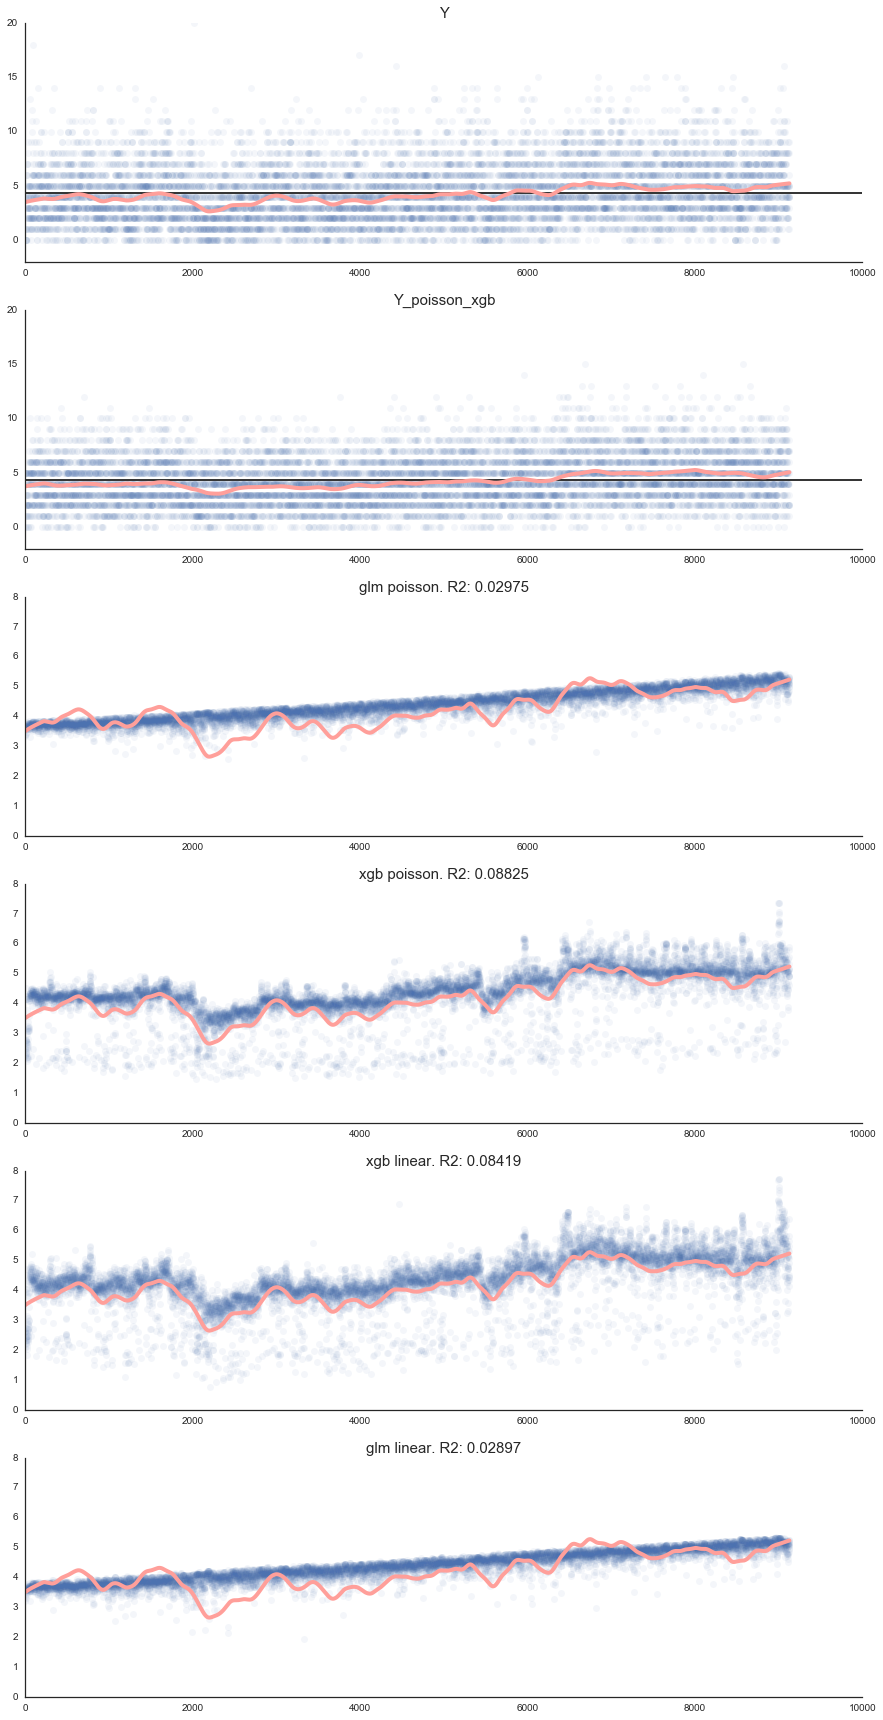

In [504]:
ylim=[0,8]
alpha = 0.06
lw=4
plt.subplots(figsize=(15, 30))
plt.subplot(616)
plt.plot(Y_hat_glmlinear,'o',alpha=alpha)
plt.plot(z[:,0],z[:,1],color='r',lw=lw)
plt.title('glm linear. R2: %.5f' % np.mean(pR2_cv_glmlinear),fontsize=15)
plt.ylim(ylim)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplot(613)
plt.plot(Y_hat_glm,'o',alpha=alpha)
plt.plot(z[:,0],z[:,1],color='r',lw=lw)
plt.title('glm poisson. R2: %.5f' % np.mean(pR2_cv_glm),fontsize=15)
plt.ylim(ylim)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
if 0:
    plt.subplot(616)
    plt.plot(Y_hat_pyglmnet,'o',alpha=alpha)
    plt.plot(z[:,0],z[:,1],color='r',lw=lw)
    plt.title('glmnet_pv',fontsize=15)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylim(ylim)
if 1:
    Y_poisson_xgb = np.random.poisson(Y_hat_xgb)
    plt.subplot(612)
    plt.plot(Y_poisson_xgb,'o',alpha=alpha)
    plt.title('Y_poisson_xgb',fontsize=15)
    plt.plot([0,10000],[np.mean(Y_poisson_xgb),np.mean(Y_poisson_xgb)],color='k')
    plt.plot(z_poisson_xgb[:,0],z_poisson_xgb[:,1],color='r',lw=lw)
    plt.ylim([-2,20])
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
if 0:
    plt.subplot(616)
    plt.plot(Y_hat_lasB,'o',alpha=alpha)
    plt.plot(z[:,0],z[:,1],color='r',lw=lw)
    plt.title('lasagne',fontsize=15)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylim(ylim)

plt.subplot(614)
plt.plot(Y_hat_xgb,'o',alpha=alpha)
plt.plot(z[:,0],z[:,1],color='r',lw=lw)
plt.title('xgb poisson. R2: %.5f' % np.mean(pR2_cv_xgb),fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(ylim)
plt.subplot(615)
plt.plot(Y_hat_xgblinear,'o',alpha=alpha)
plt.plot(z[:,0],z[:,1],color='r',lw=lw)
plt.title('xgb linear. R2: %.5f' % np.mean(pR2_cv_xgblinear),fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(ylim)
plt.subplot(611)
plt.plot(Y,'o',alpha=alpha)
plt.title('Y',fontsize=15)
plt.plot([0,10000],[np.mean(Y),np.mean(Y)],color='k')
plt.plot(z[:,0],z[:,1],color='r',lw=lw)
plt.ylim([-2,20])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

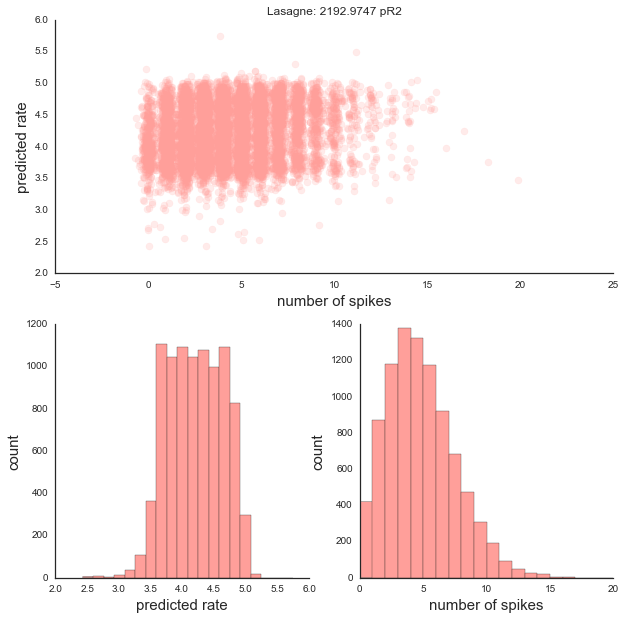

In [306]:
title = 'py_glmnet: %.4f pR2' % (np.mean(pR2_cv_pyglmnet))
vis_pred(Y_hat_pyglmnet, Y, title)

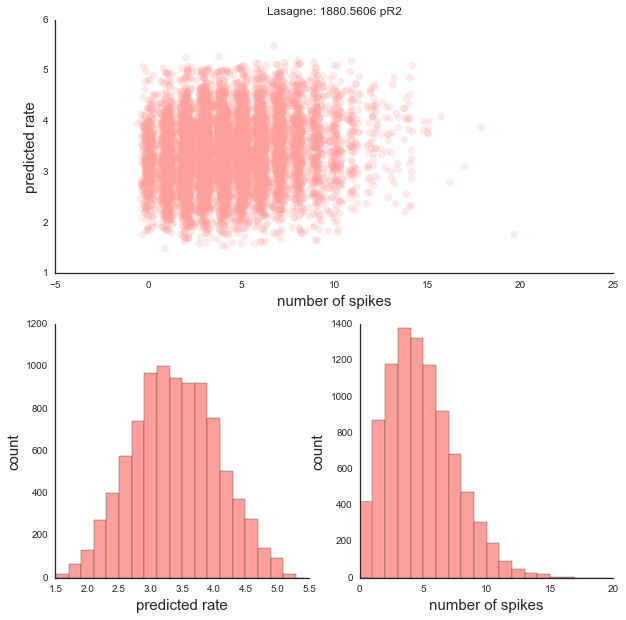

In [182]:
title = 'Lasagne: %.4f pR2' % (np.mean(pR2_cv_lasB))
vis_pred(Y_hat_lasB, Y, title)

In [479]:

Y_hat_glmlinear, pR2_cv_glmlinear = fit_cv(X, Y, algorithm = 'cv_glmnet_linear', n_cv=10, silent=0)

...runnning cv-fold 1 of 10
pR2:  0.0298027465411
...runnning cv-fold 2 of 10
pR2:  0.0135374713376
...runnning cv-fold 3 of 10
pR2:  0.0256148112278
...runnning cv-fold 4 of 10
pR2:  0.0283195149801
...runnning cv-fold 5 of 10
pR2:  0.0380173001019
...runnning cv-fold 6 of 10
pR2:  0.0196116269295
...runnning cv-fold 7 of 10
pR2:  0.02919243079
...runnning cv-fold 8 of 10
pR2:  0.0374727819254
...runnning cv-fold 9 of 10
pR2:  0.0329882035245
...runnning cv-fold 10 of 10
pR2:  0.0351064452753
pR2_cv: 0.028966 (+/- 0.002337)


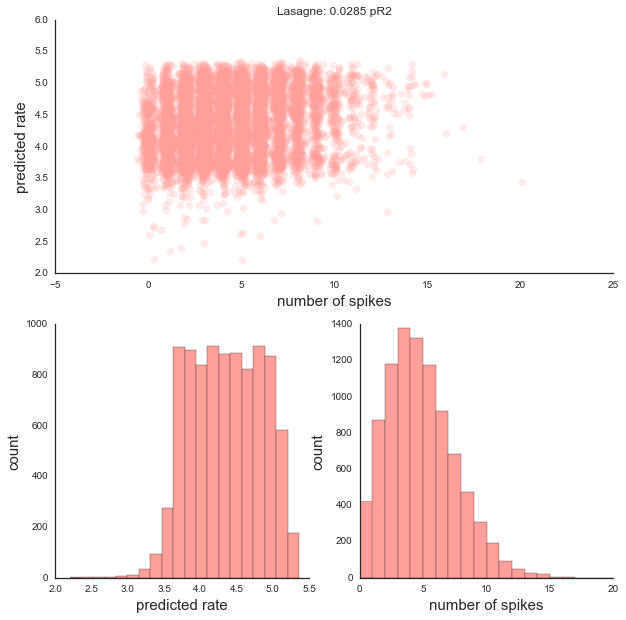

In [263]:
title = 'Lasagne: %.4f pR2' % (np.mean(pR2_cv_glmlinear))
vis_pred(Y_hat_glmlinear, Y, title)

### now we are ready to predict, let's start with Xgboost

In [474]:
Y_hat_xgb, pR2_cv_xgb = fit_cv(X, Y, algorithm = 'XGBoost', n_cv=10, silent=0)

...runnning cv-fold 1 of 10
pR2:  0.102022560686
...runnning cv-fold 2 of 10
pR2:  0.0441511533387
...runnning cv-fold 3 of 10
pR2:  0.0753746682729
...runnning cv-fold 4 of 10
pR2:  0.0937986974841
...runnning cv-fold 5 of 10
pR2:  0.114297097517
...runnning cv-fold 6 of 10
pR2:  0.0532152929839
...runnning cv-fold 7 of 10
pR2:  0.104215603732
...runnning cv-fold 8 of 10
pR2:  0.111240554216
...runnning cv-fold 9 of 10
pR2:  0.081106086744
...runnning cv-fold 10 of 10
pR2:  0.103122222293
pR2_cv: 0.088254 (+/- 0.007275)


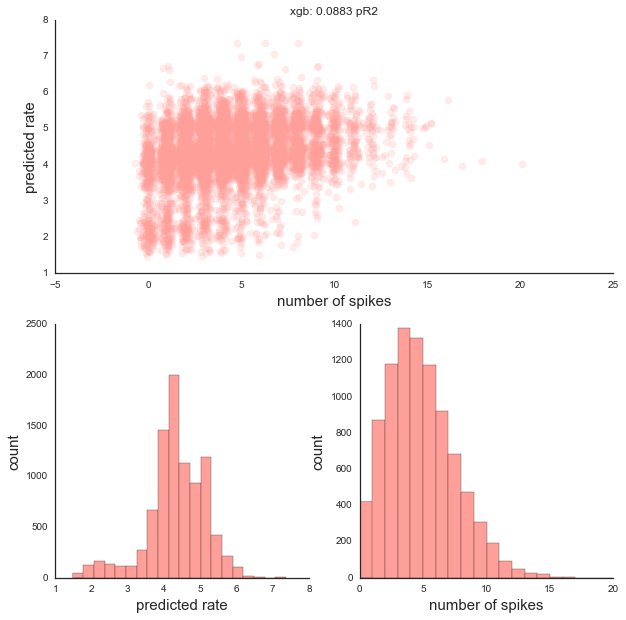

In [475]:
title = 'xgb: %.4f pR2' % (np.mean(pR2_cv_xgb))
vis_pred(Y_hat_xgb, Y, title)

In [313]:
Y_hat_glm, pR2_cv_glm = fit_cv(X, Y, algorithm = 'cv_glmnet_poisson',n_cv=10, silent=0)

...runnning cv-fold 1 of 10
pR2:  0.0201473198444
...runnning cv-fold 2 of 10
pR2:  0.0172194440048
...runnning cv-fold 3 of 10
pR2:  0.0269766764747
...runnning cv-fold 4 of 10
pR2:  0.028464831216
...runnning cv-fold 5 of 10
pR2:  0.0344787067832
...runnning cv-fold 6 of 10
pR2:  0.0439481843263
...runnning cv-fold 7 of 10
pR2:  0.00159153820343
...runnning cv-fold 8 of 10
pR2:  0.0383257998378
...runnning cv-fold 9 of 10
pR2:  0.049398923356
...runnning cv-fold 10 of 10
pR2:  0.0369088632141
pR2_cv: 0.029746 (+/- 0.004226)


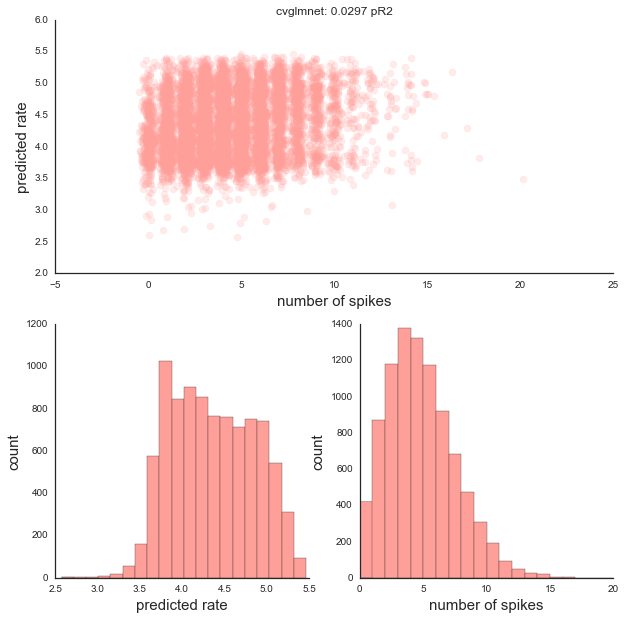

In [483]:
title = 'cvglmnet: %.4f pR2' % (np.mean(pR2_cv_glm))
vis_pred(Y_hat_glm, Y, title)

In [477]:
Y_hat_xgblinear, pR2_cv_xgblinear = fit_cv(X, Y, algorithm = 'XGBoost_linear',n_cv=10)

pR2_cv: 0.084191 (+/- 0.008581)


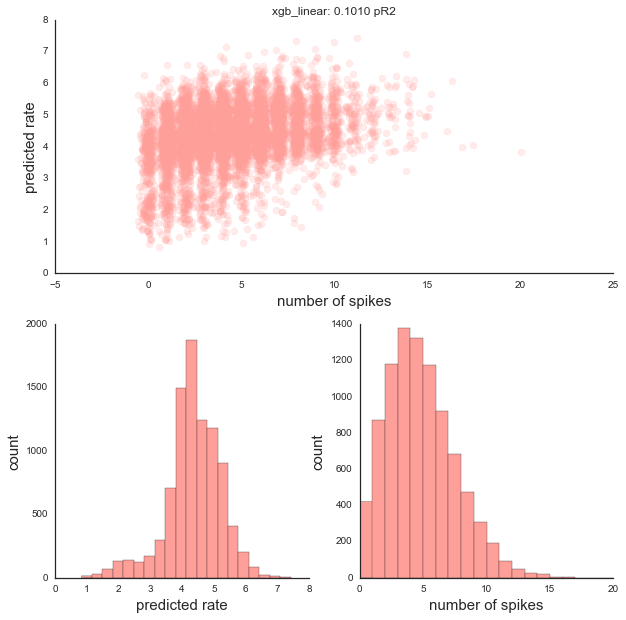

In [111]:
title = 'xgb_linear: %.4f pR2' % (np.mean(pR2_cv_xgblinear))
vis_pred(Y_hat_xgblinear, Y, title)

In [264]:
Y_hat_glmlinear, pR2_cv_glmlinear = fit_cv(X, Y, algorithm = 'cv_glmnet_linear',n_cv=10)

pR2_cv: 0.028543 (+/- 0.004345)


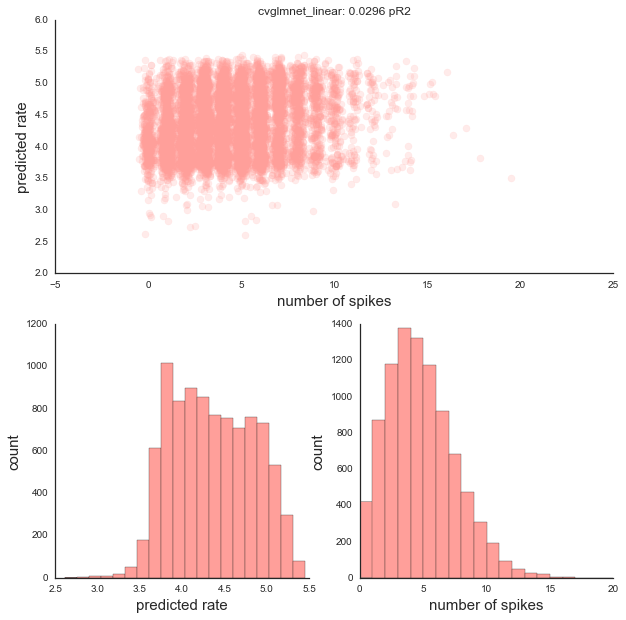

In [116]:
title = 'cvglmnet_linear: %.4f pR2' % (np.mean(pR2_cv_glmlinear))
vis_pred(Y_hat_glmlinear, Y, title)

In [10]:
# let's define some functions. move these to a script file and import
def get_event_times_restict(fix_onset, fix_offset, restrict, fix_durs, event = 'fix_onset'):
    fix_durs = np.array(fix_durs)/1000.
    fix_dur = np.array([(fix_offset[fix_offset>i]-i)[0] for i in fix_onset])
    print '1 '
    print np.shape(fix_dur)
    val_len_fix = np.intersect1d(np.where(fix_dur>fix_durs [0]),np.where(fix_dur<fix_durs[1]))
    val_len_fix = np.intersect1d(restrict,val_len_fix)
    print '2 '
    print np.shape(val_len_fix)
    if event == 'fix_onset':
        event_times_restr = fix_onset[val_len_fix]
    elif event == 'fix_offset':
        event_times_restr = fix_offset[val_len_fix]
    return val_len_fix, event_times_restr

def make_psth(spike_times, event_times, t_window=[-100,200], bin_size=10., plot_psth=1, title = 'PSTH', fix_durs = [], vlinepos = [], Color = 'b'):
    
    fix_durs = np.array(fix_durs)
    t_window = np.array(t_window)
    time_res = 0.001*bin_size
    n_max_seconds = spike_times[-1]
    n_min_seconds = spike_times[0]
    event_times = event_times[event_times < n_max_seconds]
    event_times = event_times[event_times > n_min_seconds]
    bins = np.arange(np.floor(n_min_seconds),np.ceil(n_max_seconds),time_res)

    [spike_counts, bin_edges] = np.histogram(spike_times, bins)
    [event_counts, bin_edges] = np.histogram(event_times, bins)
    idx_event =  np.where(event_counts > 0)[0]
    
    psth = np.array([(spike_counts[(i+t_window[0]/bin_size):(i+t_window[1]/bin_size)]) for i in idx_event])
    
    #plot
    if plot_psth==1:
        mean_psth = np.mean(psth,axis=0)/time_res
        std_psth = np.sqrt(np.var(psth,axis=0))/time_res
        sem_psth = std_psth/np.shape(mean_psth)[0]
        xx = np.linspace(t_window[0], t_window[1], num=np.diff(t_window)/bin_size)
        n_seconds = (spike_times[-1]-spike_times[0])
        n_spikes = np.size(spike_times)
        firing_rate = (n_spikes/n_seconds)
        
        fig.suptitle(title, fontsize=14, fontweight='bold')
        ax = fig.add_subplot(111)
        fig.subplots_adjust(top=0.85)
        
        #ax.plot([0,0],[np.min(mean_psth),np.max(mean_psth)], color='k')
        ax.plot([0,0],[0,np.max(mean_psth)], color='k')
        if np.size(fix_durs)>0:
            if np.shape(vlinepos)[0]>0:
                ypos = vlinepos[0]
            else:
                ypos = np.min(mean_psth)-np.abs(min(mean_psth))/2.
            ax.plot(fix_durs,ypos*np.ones(2), color=Color, ls ='-',lw=4)
            ax.annotate('%s: %.0f fixations' % (str(interv),np.shape(psth)[0]), xy=(fix_durs[1], ypos), xytext=(fix_durs[1]+15, ypos))

        ax.plot(xx, mean_psth, color=Color,lw=2)
        ax.plot(xx, mean_psth+sem_psth, color=Color, ls =':')
        ax.plot(xx, mean_psth-sem_psth, color=Color, ls =':')
        ax.legend(['event'])
        ax.set_title('Average firing rate %.1f Spks/s' % (firing_rate))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel('time [ms]')
        ax.set_ylabel('spikes per second [spks/s]') 
    
    return psth